# Homework # 4 Naive BAYES Classifier

### Instructor - Dr. Uma Gajendragadkar

### Problem - Design and develop Machine learning model to predict Diabetes using Naive Bayes Algorithm. 

### Dataset - Diabetes dataset

This dataset consists of 768 observations & 8 numerical independent variables.
Dependent and target variable is OUTCOME. 1 means diabetes test result being positive, 0 means indicates negative.

Pregnancies: Number of Times Being Pregnant

Glucose: Plasma Glucose Concentration (a 2 hours in an oral glucose tolerance test)

BloodPressure: Diastolic Blood Pressure (mm Hg)

SkinThickness: Triceps Skin Fold Thickness (mm)

Insulin: 2-Hour Serum Insulin (mu U/ml)

BMI: Body Mass Index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes Pedigree Function

Age: Age

Outcome: Class variable ( 0 - 1)



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_validate
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot  as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB

Step 1 - Write code to Read data from dataset into pandas dataframe

In [4]:
df = pd.read_csv('diabetes.csv')

Step 2 - a) Write code to display dataset info 
b) Print 10 rows from dataset.

In [6]:
# a) Write code to display dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# b) Print 10 rows from dataset.
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1
5,5,116,74,0,0,25.600,0.201,30,0
6,3,78,50,32,88,31.000,0.248,26,1
7,10,115,0,0,0,35.300,0.134,29,0
8,2,197,70,45,543,30.500,0.158,53,1
9,8,125,96,0,0,0.000,0.232,54,1


Step 3 - Write code to remove Pregnancy column 

In [9]:
df.drop('Pregnancies', axis=1, inplace=True)

Step 4 - Write code to display info of dataset and check shape of dataset.

In [11]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


(768, 8)

Step 5 - Write code to clean data

In [13]:
# Replace 0s with NaN in key columns
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df[cols] = df[cols].replace(0, np.nan)

# Remove duplicate rows, if any
df.drop_duplicates(inplace=True)

# Fill missing values with column means
df.fillna(df.mean(), inplace=True)

# Separate features (X) and target (y)
X = inputs = df.drop('Outcome', axis=1)  
y = target = df['Outcome']

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

display(X.head())
display(y.head())

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.000,72.000,35.000,155.548,33.600,0.627,50
1,85.000,66.000,29.000,155.548,26.600,0.351,31
2,183.000,64.000,29.153,155.548,23.300,0.672,32
3,89.000,66.000,23.000,94.000,28.100,0.167,21
4,137.000,40.000,35.000,168.000,43.100,2.288,33


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

Step 6 - Split data into training and testing sets ( 80: 20 ratio)

In [15]:
# Split the data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

#### **Step #7: Initialize your model**




In [17]:
# Initialize model
model = GaussianNB()

#### **Step #8: Fit your model, test on the testing data, and create a visualization if applicable**

In [19]:
# Fit your mode
model.fit(X_train, y_train);

In [20]:
# test on the testing data
model.score(X_test,y_test)

0.7532467532467533

Step 9 - Predict using model on test data

In [22]:
y_pred = np.array(model.predict(X_test))
y_pred_probability= np.array(model.predict_proba(X_test)) # calculate the probabilities

print(y_pred[:5])
for i in range (1,6):
      print(y_pred_probability[i][0],end=", ")

[0 0 0 0 1]
0.8840204198860998, 0.9594939386443437, 0.8726317153724374, 0.4397573678002371, 0.5272738071872277, 

Step 10 -  Find accuracy of model

In [24]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.7532467532467533

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81        99
           1       0.66      0.64      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



Step 11 - Confusion Matrix

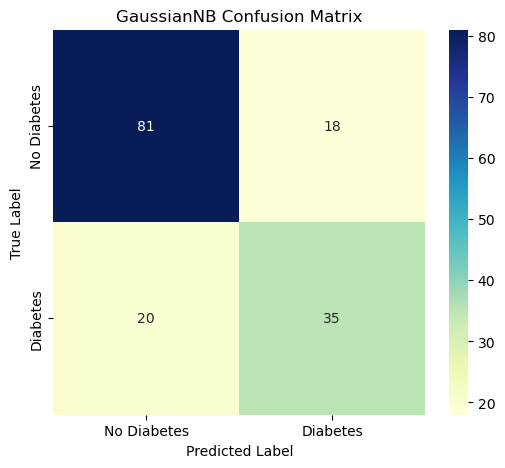

In [26]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('GaussianNB Confusion Matrix')
plt.show()